<h1> 🖥️ Procesamiento de datos para tienda Aurelion (Grupo # 6)</h1>
<p>Proyecto de práctica para el bootcamp de fundamento de Inteligencia Artificial de GUAYERD</p>

<h2>1. Importación de Librerías</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

<h2>2. Lectura de datos</h2>

In [2]:
current_dir = os.getcwd()
print("Current Directory:", current_dir)

Current Directory: /home/jota/projects/python/guayerd_ia


In [3]:
# Configuración de rutas base
data_location = "data"
data_path = os.path.join(current_dir, data_location)

# nombre de los archivos
file_clientes = "clientes.csv"
file_productos = "productos.csv"
file_ventas = "ventas.csv"
file_dventas = "detalle_ventas.csv"

# lectura de los archivos
df_clientes = pd.read_csv(os.path.join(data_path, file_clientes)) #dataframe clientes
df_productos = pd.read_csv(os.path.join(data_path, file_productos)) #dataframe productos
df_ventas = pd.read_csv(os.path.join(data_path, file_ventas)) #dataframe ventas
df_dventas = pd.read_csv(os.path.join(data_path, file_dventas)) #dataframe detalle ventas

<h2>3. Preparación de los datos</h2>

<h3>3.1 Verificación de unicidad de ids en datasets (Primary Keys)</h3>

In [4]:
print(df_clientes['id_cliente'].is_unique)
print(df_productos['id_producto'].is_unique)
print(df_ventas['id_venta'].is_unique)
print(df_dventas['id_venta'].is_unique)

True
True
True
False


<h3>3.2 Unificación de datasets</h3>

In [5]:
#Merging df_ventas con df_detalle_ventas
DF_VENTAS = pd.merge(df_ventas, df_dventas, on='id_venta', how='inner', suffixes=('_venta', '_detalle'))
DF_VENTAS.head()

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,90,Toallas Húmedas x50,1,2902,2902
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,82,Aceitunas Negras 200g,5,2394,11970
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,39,Helado Vainilla 1L,5,469,2345
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,70,Fernet 750ml,2,4061,8122
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,22,Medialunas de Manteca,1,2069,2069


In [6]:
#Merging DF_VENTAS con df_clientes
DF_VENTAS_CLIENTES = pd.merge(DF_VENTAS, df_clientes, on='id_cliente', how='inner', suffixes=('_venta', '_cliente'))
DF_VENTAS_CLIENTES.head()

,id_venta,fecha,id_cliente,nombre_cliente_venta,email_venta,medio_pago,id_producto,nombre_producto,cantidad,precio_unitario,importe,nombre_cliente_cliente,email_cliente,ciudad,fecha_alta
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,90,Toallas Húmedas x50,1,2902,2902,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,82,Aceitunas Negras 200g,5,2394,11970,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,39,Helado Vainilla 1L,5,469,2345,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,70,Fernet 750ml,2,4061,8122,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,22,Medialunas de Manteca,1,2069,2069,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


In [7]:
# Unificación faltante: DF_VENTAS_CLIENTES con df_productos
aurelion_raw = pd.merge(DF_VENTAS_CLIENTES, df_productos, on='id_producto', how='inner', suffixes=('_venta', '_producto'))
aurelion_raw.head()

,id_venta,fecha,id_cliente,nombre_cliente_venta,email_venta,medio_pago,id_producto,nombre_producto_venta,cantidad,precio_unitario_venta,importe,nombre_cliente_cliente,email_cliente,ciudad,fecha_alta,nombre_producto_producto,categoria,precio_unitario_producto
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,90,Toallas Húmedas x50,1,2902,2902,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03,Toallas Húmedas x50,Limpieza,2902
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,82,Aceitunas Negras 200g,5,2394,11970,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Aceitunas Negras 200g,Alimentos,2394
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,39,Helado Vainilla 1L,5,469,2345,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Helado Vainilla 1L,Alimentos,469
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,70,Fernet 750ml,2,4061,8122,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Fernet 750ml,Licores,4061
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,22,Medialunas de Manteca,1,2069,2069,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Medialunas de Manteca,Alimentos,2069


In [8]:
aurelion_raw.shape

(343, 18)

In [9]:
aurelion_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_venta                  343 non-null    int64 
 1   fecha                     343 non-null    object
 2   id_cliente                343 non-null    int64 
 3   nombre_cliente_venta      343 non-null    object
 4   email_venta               343 non-null    object
 5   medio_pago                343 non-null    object
 6   id_producto               343 non-null    int64 
 7   nombre_producto_venta     343 non-null    object
 8   cantidad                  343 non-null    int64 
 9   precio_unitario_venta     343 non-null    int64 
 10  importe                   343 non-null    int64 
 11  nombre_cliente_cliente    343 non-null    object
 12  email_cliente             343 non-null    object
 13  ciudad                    343 non-null    object
 14  fecha_alta                

<h3>3.3 Limpieza del dataset unificado</h3>

In [10]:
#Copia del dataframe resultante
aurelion = aurelion_raw.copy()

In [11]:
aurelion.drop(columns=['id_venta', 'id_cliente', 'id_producto', 'nombre_cliente_cliente', 'nombre_producto_producto', 'email_venta', 'precio_unitario_venta'], inplace=True)
aurelion.head(3)

,fecha,nombre_cliente_venta,medio_pago,nombre_producto_venta,cantidad,importe,email_cliente,ciudad,fecha_alta,categoria,precio_unitario_producto
0,2024-06-19,Guadalupe Romero,tarjeta,Toallas Húmedas x50,1,2902,guadalupe.romero@mail.com,Carlos Paz,2023-03-03,Limpieza,2902
1,2024-03-17,Olivia Gomez,qr,Aceitunas Negras 200g,5,11970,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Alimentos,2394
2,2024-03-17,Olivia Gomez,qr,Helado Vainilla 1L,5,2345,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Alimentos,469


In [12]:
#renombrado de columnas
aurelion.rename(columns={
    'fecha': 'fecha_venta',
    'nombre_cliente_venta': 'nombre_cliente',
    'nombre_producto_venta': 'producto_comprado',
    'nombre_cliente': 'nombre_cliente',
    'email_cliente': 'email_cliente',
    'precio_unitario_producto': 'precio_unitario'
}, inplace=True)

#reordenar columnas
aurelion = aurelion[['fecha_venta', 'nombre_cliente', 'email_cliente','ciudad','fecha_alta', 'producto_comprado','categoria', 'cantidad', 'precio_unitario', 'importe', 'medio_pago']]

aurelion.head(3)

,fecha_venta,nombre_cliente,email_cliente,ciudad,fecha_alta,producto_comprado,categoria,cantidad,precio_unitario,importe,medio_pago
0,2024-06-19,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03,Toallas Húmedas x50,Limpieza,1,2902,2902,tarjeta
1,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Aceitunas Negras 200g,Alimentos,5,2394,11970,qr
2,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Helado Vainilla 1L,Alimentos,5,469,2345,qr


In [13]:
#Verificación de tipos de datos
aurelion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fecha_venta        343 non-null    object
 1   nombre_cliente     343 non-null    object
 2   email_cliente      343 non-null    object
 3   ciudad             343 non-null    object
 4   fecha_alta         343 non-null    object
 5   producto_comprado  343 non-null    object
 6   categoria          343 non-null    object
 7   cantidad           343 non-null    int64 
 8   precio_unitario    343 non-null    int64 
 9   importe            343 non-null    int64 
 10  medio_pago         343 non-null    object
dtypes: int64(3), object(8)
memory usage: 29.6+ KB


In [14]:
#Formateo de datos
aurelion['fecha_venta'] = pd.to_datetime(aurelion['fecha_venta'], format='%Y-%m-%d')
aurelion['fecha_alta'] = pd.to_datetime(aurelion['fecha_alta'], format='%Y-%m-%d')

In [15]:
# Reverificación de tipos de datos
aurelion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha_venta        343 non-null    datetime64[ns]
 1   nombre_cliente     343 non-null    object        
 2   email_cliente      343 non-null    object        
 3   ciudad             343 non-null    object        
 4   fecha_alta         343 non-null    datetime64[ns]
 5   producto_comprado  343 non-null    object        
 6   categoria          343 non-null    object        
 7   cantidad           343 non-null    int64         
 8   precio_unitario    343 non-null    int64         
 9   importe            343 non-null    int64         
 10  medio_pago         343 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 29.6+ KB


<hr>
<h2>4. Requisitos de segunda entrega</h2>

<h4>4.1 Parámetros estadísticos básicos (Medidas de tendencia central y dispersión)</h4>

In [16]:
#extracción de variables tipo entero
aurelion.describe(include=['int64'])

,cantidad,precio_unitario,importe
count,343.000000,343.000000,343.000000
mean,2.962099,2654.495627,7730.078717
std,1.366375,1308.694720,5265.543077
min,1.000000,272.000000,272.000000
25%,2.000000,1618.500000,3489.000000
50%,3.000000,2512.000000,6702.000000
75%,4.000000,3876.000000,10231.500000
max,5.000000,4982.000000,24865.000000


<h3>4.2 Identificación del tipo de distribución de variable</h3>

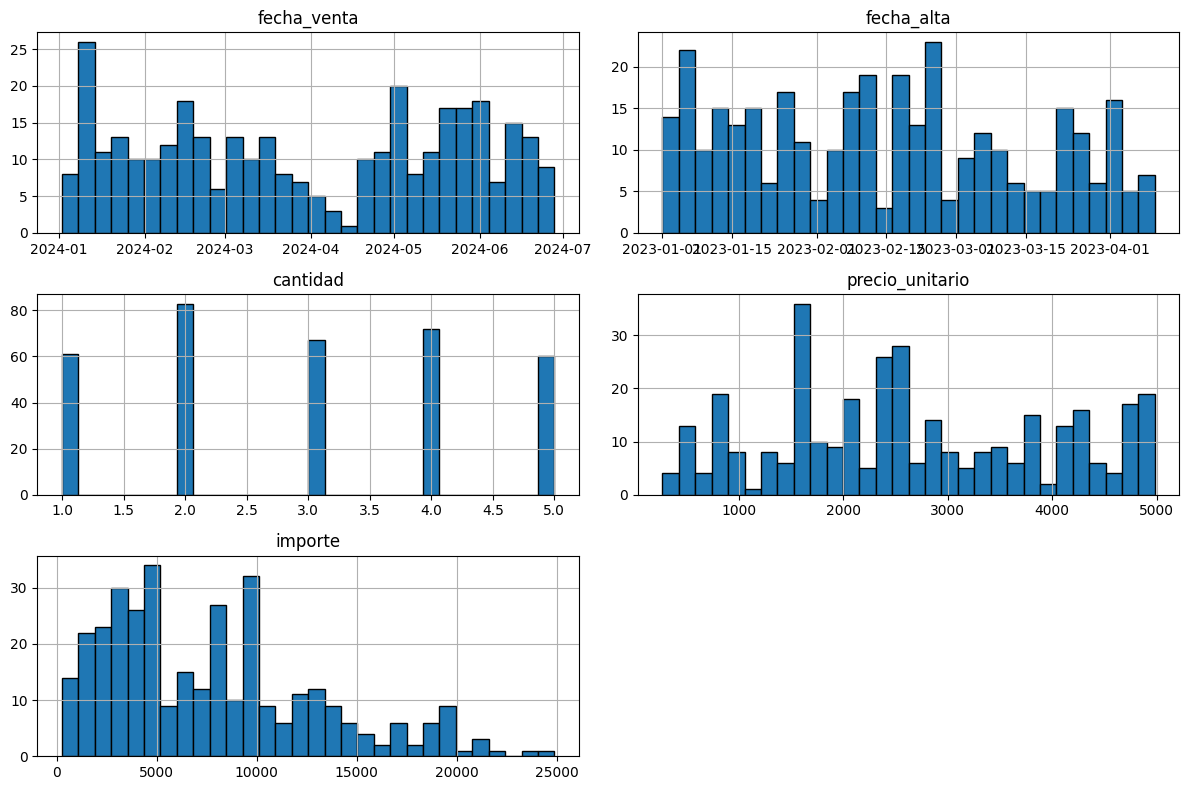

In [17]:
aurelion.hist(bins=30, figsize=(12, 8),edgecolor='black')
plt.tight_layout()
plt.show()

<p>
en su mayoría tenemos distribuciones multimodales, con picos en ciertos valores específicos. Esto sugiere que hay grupos distintos dentro de los datos, posiblemente debido a diferentes categorías de productos o patrones de compra.
</p>

<h3>4.3 Análisis de correlaciones entre variables</h3>

In [18]:
#matriz de correlación
numeric=aurelion.select_dtypes(include=['int64', 'float64'])
numeric.corr()

,cantidad,precio_unitario,importe
cantidad,1.000000,-0.074483,0.599723
precio_unitario,-0.074483,1.000000,0.679298
importe,0.599723,0.679298,1.000000


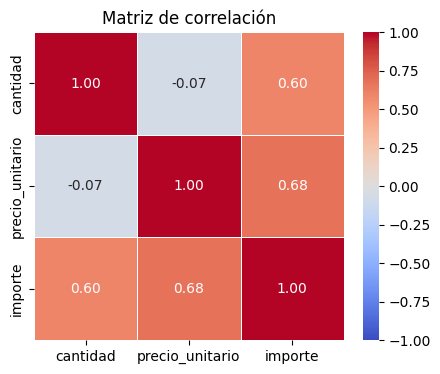

In [19]:
plt.figure(figsize=(5,4))
sns.heatmap(numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Matriz de correlación")
plt.show()

<h3>4.4 Detección de valores atípicos (ouliers)</h3>

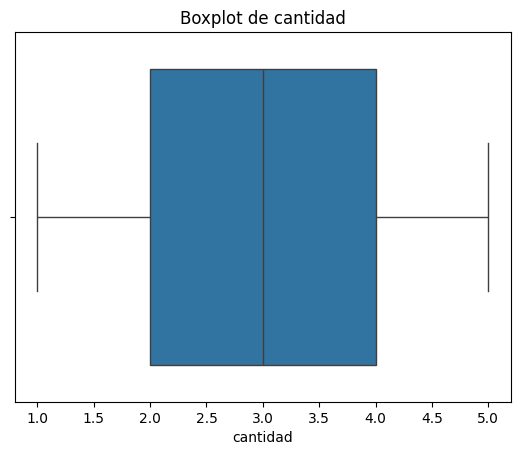

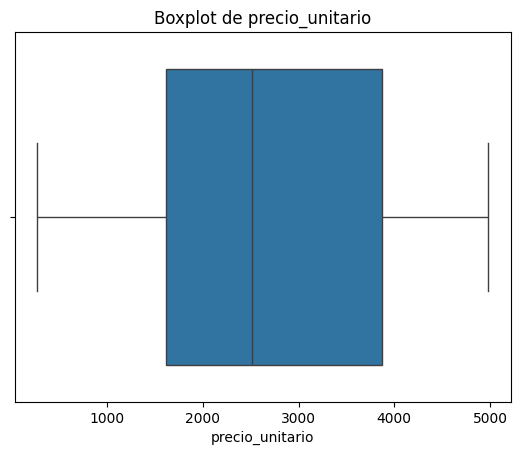

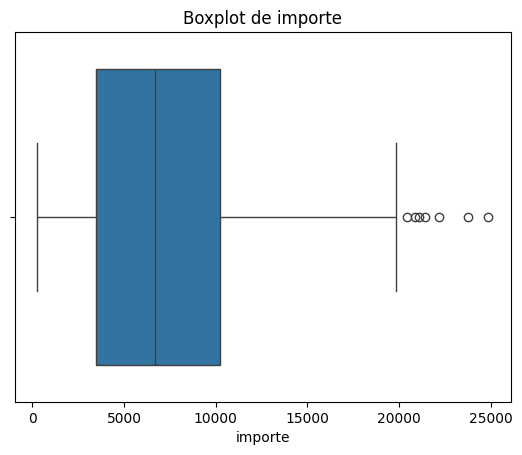

In [20]:
for col in numeric.columns:
    plt.figure()
    sns.boxplot(x=numeric[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

<p>De lo boxplots podemos notar valores atípicos en la variable de importe, los valores atípicos pueden sesgar análisis estadísticos y afectar la precisión de modelos
</p>

In [21]:
# Cuartiles de importe
importe_Q1 = aurelion['importe'].quantile(0.25)
importe_Q2 = aurelion['importe'].quantile(0.50)
importe_Q3 = aurelion['importe'].quantile(0.75)
importe_IQR = importe_Q3 - importe_Q1
importe_limite_superior = importe_Q3 + 1.5 * importe_IQR

print(f"Importe Q1: {importe_Q1}")
print(f"Importe Q2 (Mediana): {importe_Q2}")
print(f"Importe Q3: {importe_Q3}")
print(f"Importe IQR: {importe_IQR}")
print(f"Importe Límite Superior: {importe_limite_superior}")

Importe Q1: 3489.0
Importe Q2 (Mediana): 6702.0
Importe Q3: 10231.5
Importe IQR: 6742.5
Importe Límite Superior: 20345.25


In [22]:
# Identificación de outliers
outliers = aurelion['importe'] > importe_limite_superior
aurelion_outliers = aurelion[outliers]
aurelion_outliers.shape


(7, 11)

<p> de los 343 registros que tenemos 7 son aquellos outliers visualizados en el boxplot</p>

In [23]:
aurelion_outliers[['nombre_cliente', 'importe', 'fecha_venta']]

,nombre_cliente,importe,fecha_venta
41,Nicolas Rojas,22150,2024-04-12
54,Karina Acosta,21430,2024-06-19
141,Bruno Castro,23760,2024-01-09
175,Karina Castro,21090,2024-06-19
208,Guadalupe Martinez,24865,2024-05-23
260,Elena Rodriguez,20450,2024-03-06
308,Mariana Rodriguez,20850,2024-05-19


<h2>4.5 Gráficos Representativos y Estructura General de Análisis</h2>

<h3>Problema Planteado</h3>

¿Qué factores influyen en el volumen de ventas y cómo pueden optimizarse las estrategias comerciales para aumentar las compras de los productos con menor rotación?

<h4>1️⃣ Analisis del volumen total de ventas por producto</h4>

/tmp/ipykernel_19581/1770560915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad', y='producto_comprado', data=ventas_por_producto.head(15), palette='viridis')


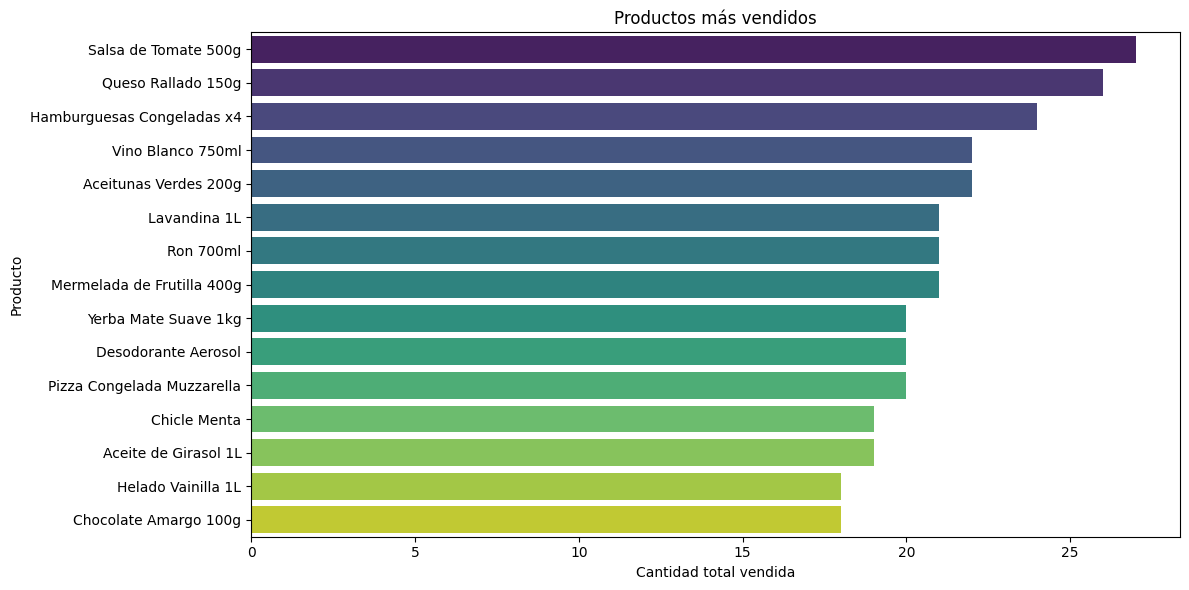

In [28]:
# Ventas totales por producto
ventas_por_producto = aurelion.groupby('producto_comprado')['cantidad'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='cantidad', y='producto_comprado', data=ventas_por_producto.head(15), palette='viridis')
plt.title('Productos más vendidos')
plt.xlabel('Cantidad total vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

<h4>2️⃣ Relación entre precio y cantidad vendida</h4>

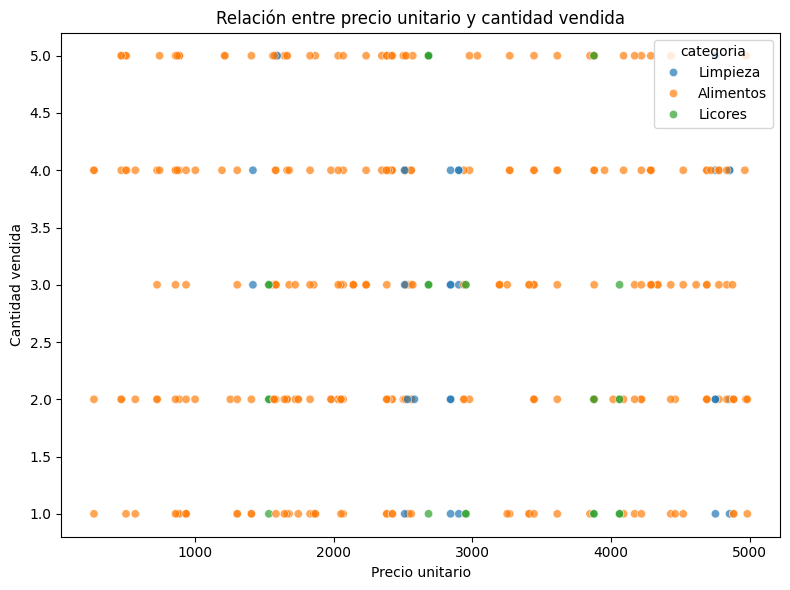

Correlación entre precio y cantidad: -0.07


In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='precio_unitario', y='cantidad', data=aurelion, hue='categoria', alpha=0.7)
plt.title('Relación entre precio unitario y cantidad vendida')
plt.xlabel('Precio unitario')
plt.ylabel('Cantidad vendida')
plt.tight_layout()
plt.show()

# Correlación numérica
correlacion_precio_cantidad = aurelion['precio_unitario'].corr(aurelion['cantidad'])
print(f"Correlación entre precio y cantidad: {correlacion_precio_cantidad:.2f}")

🔎 Interpretación:

Según este gráfico, no se observa una correlación evidente entre el precio y la cantidad vendida. Esto sugiere que otros factores (como promociones, disponibilidad o fidelidad del cliente) podrían tener más peso en el volumen de ventas que el precio en sí.

<h4>3️⃣ Analizar ventas por categoría de producto</h4>

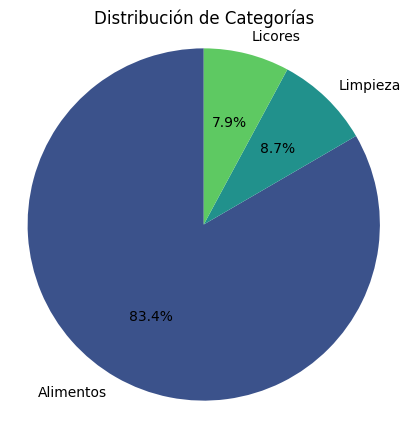

In [26]:
# Extracción y conteo por categoría
counts = aurelion['categoria'].value_counts()
labels = counts.index

# Configuración de paletta (guía de paletas: 'viridis', 'magma', 'pastel', 'Set3', 'tab10')
palette = sns.color_palette('viridis', n_colors=len(counts))

# Impresión del gráfico usando la paleta
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=palette)
plt.axis('equal')
plt.title('Distribución de Categorías')
plt.show()

🔎 Interpretación:

Los productos de la categoría alimentos representan la mayor contribución a los ingresos totales de la empresa, lo que sugiere una mayor rentabilidad o demanda en este segmento.
Sin embargo, para optimizar la estrategia comercial, sería útil analizar si el alto importe proviene de volúmenes de venta elevados o de precios unitarios más altos, comparando con la categoría de limpieza y licores.

<h4>4️⃣ Analisis de la influencia geográfica (ciudad)</h4>

/tmp/ipykernel_19581/3935545223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importe', y='ciudad', data=ventas_ciudad, palette='crest')


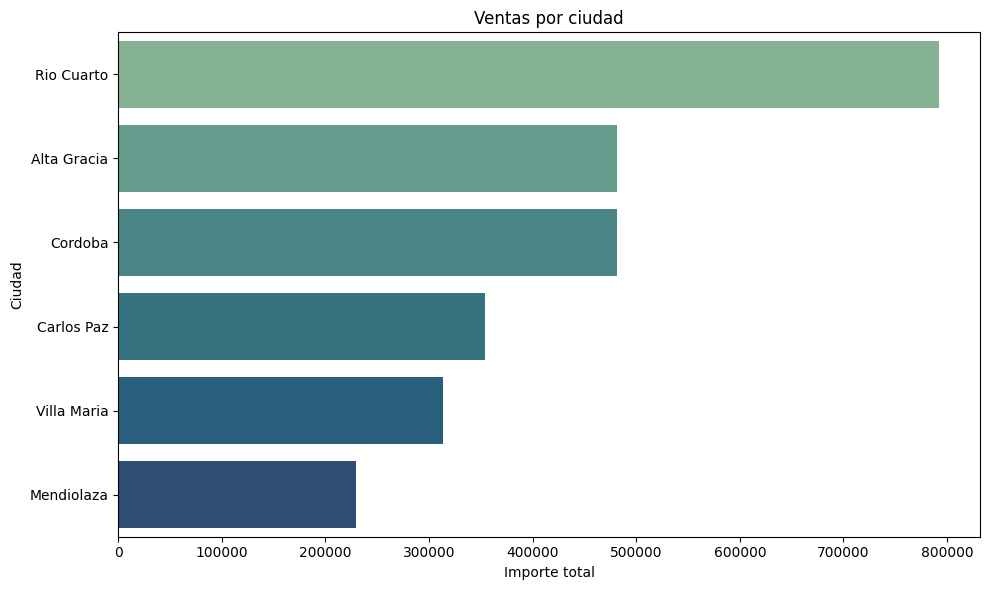

In [29]:
ventas_ciudad = aurelion.groupby('ciudad')['importe'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='importe', y='ciudad', data=ventas_ciudad, palette='crest')
plt.title('Ventas por ciudad')
plt.xlabel('Importe total')
plt.ylabel('Ciudad')
plt.tight_layout()
plt.show()

🔎 Interpretación:

Se pueden identificar mercados con bajo rendimiento, donde se podrían aplicar campañas para aumentar ventas como es el caso de Mendiolaza y Villa Maria.

<h4>5️⃣ Analisis de influencia del tiempo (mes o día)</h4>

/tmp/ipykernel_19581/507031170.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importe', y='mes', data=ventas_mes, palette='plasma')


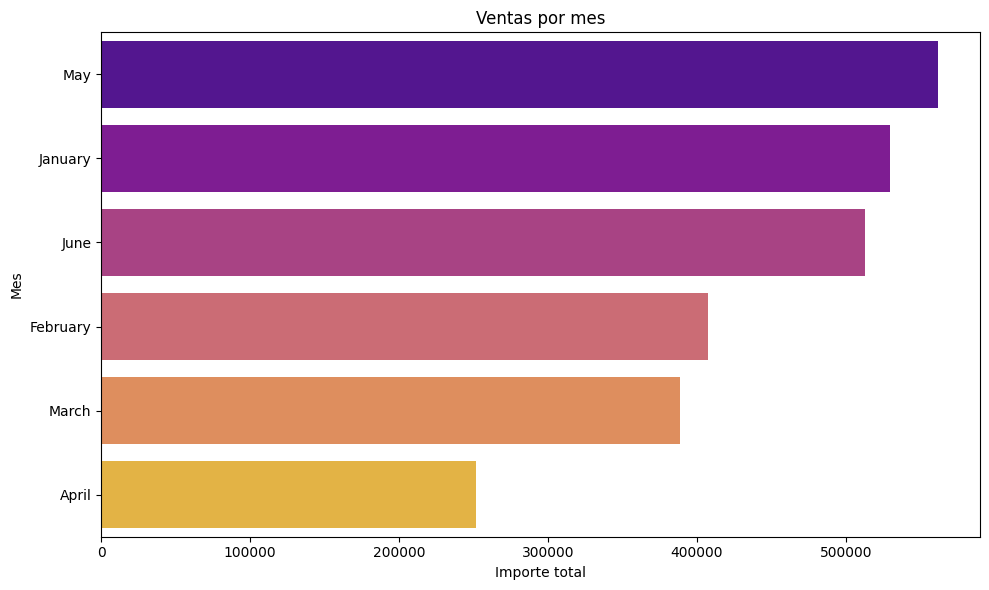

In [30]:
aurelion['mes'] = aurelion['fecha_venta'].dt.month_name()

ventas_mes = aurelion.groupby('mes')['importe'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='importe', y='mes', data=ventas_mes, palette='plasma')
plt.title('Ventas por mes')
plt.xlabel('Importe total')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

🔎 Interpretación:

Esta grafica permite identificar aquellos meses de baja venta, como son marzo y abril, lo cual con lleva a la implementacion de campañas de promociones o descuentos que permitan aumentar las ventas.

<h4>6️⃣ Analisis de medios de pago y su relación con las ventas</h4>

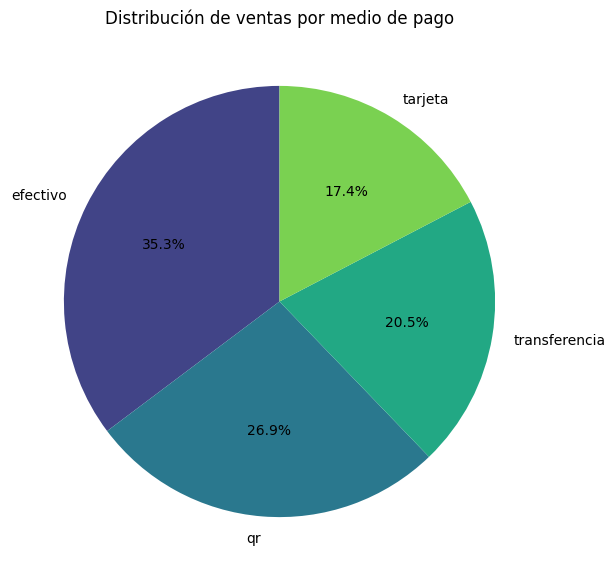

In [33]:
ventas_medio_pago = aurelion.groupby('medio_pago')['importe'].sum().sort_values(ascending=False).reset_index()

# Configuración de paletta (guía de paletas: 'viridis', 'magma', 'pastel', 'Set3', 'tab10')
palette = sns.color_palette('viridis', n_colors=len(ventas_medio_pago))

plt.figure(figsize=(7,7))
plt.pie(ventas_medio_pago['importe'], labels=ventas_medio_pago['medio_pago'], autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Distribución de ventas por medio de pago')
plt.show()

🔎 Interpretación:

El grafico permite identificar que el efectivo sigue siendo el principal medio de pago, aunque los pagos digitales (QR y transferencia) representan casi la mitad de las transacciones, lo que evidencia una transición hacia métodos más tecnológicos.
Esto sugiere que la empresa debería fortalecer su infraestructura digital (como descuentos o beneficios por usar QR o transferencia) para facilitar las ventas y mejorar la experiencia del cliente.

<h4>7️⃣ Identificación de productos con menor rotación</h4>

Para enfocar estrategias comerciales.

Productos con menor rotación:
           producto_comprado  cantidad
85               Vodka 700ml         4
86              Manteca 200g         4
87       Porotos Negros 500g         3
88            Miel Pura 250g         3
89        Yogur Natural 200g         3
90          Maní Salado 200g         3
91  Detergente Líquido 750ml         2
92  Chocolate con Leche 100g         2
93            Alfajor Triple         2
94       Galletitas Vainilla         2


/tmp/ipykernel_19581/2541629586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad', y='producto_comprado', data=productos_menos_vendidos, palette='rocket')


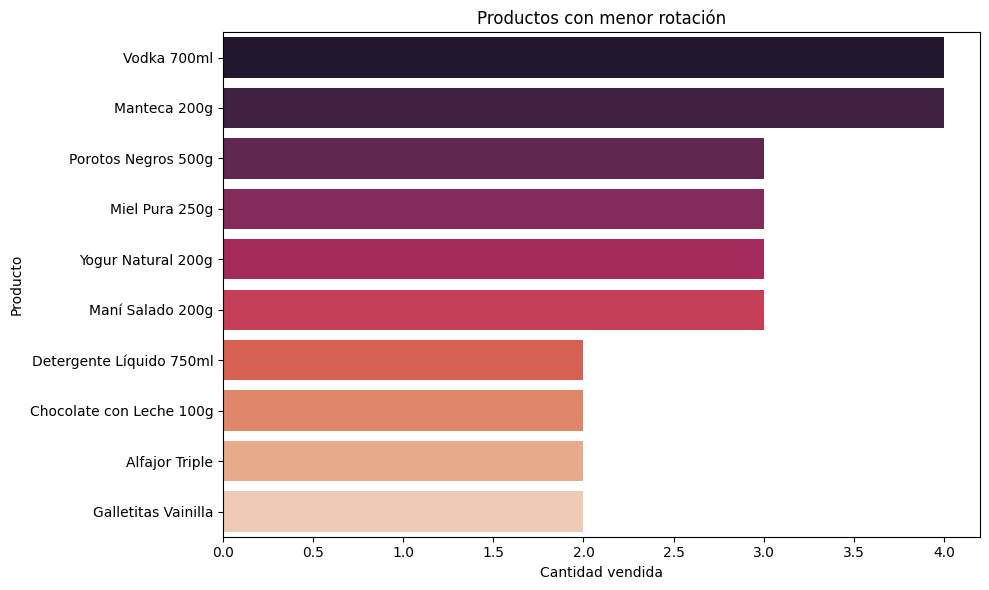

In [34]:
productos_menos_vendidos = ventas_por_producto.tail(10)
print("Productos con menor rotación:")
print(productos_menos_vendidos)

plt.figure(figsize=(10,6))
sns.barplot(x='cantidad', y='producto_comprado', data=productos_menos_vendidos, palette='rocket')
plt.title('Productos con menor rotación')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

🔎 Interpretación:

Esta grafica permite concluir que los productos con menor rotación pertenecen en su mayoría a bebidas alcohólicas y alimentos de consumo ocasional, lo que sugiere una baja demanda o falta de promoción en estas categorías.
Esto representa una oportunidad para optimizar estrategias comerciales, como descuentos, combos (cross-selling) o campañas de marketing que incrementen su visibilidad.

<hr>
<h2>Conclusión</h2>
A través del análisis de los factores precio, categoría, ubicación, tiempo y método de pago, se pueden identificar aquellos elementos que influyen en el volumen de ventas.
Los productos con baja rotación podrían beneficiarse de:

1. Ajustes en el precio unitario,
2. Campañas en ciudades con menor participación,
3. Promociones en meses de baja venta,
4. Incentivos en medios de pago preferidos,
5. estrategias de cross-selling con productos de alta demanda.